In [ ]:
from tensorflow.keras.datasets import reuters
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import pandas as pd

In [ ]:
(x_train, y_train), (x_test, y_test) = reuters.load_data(num_words=5000, test_split=0.2)

2110848/2110848 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [ ]:
print('훈련 샘플의 수: {}'.format(len(x_train)))
print('테스트 샘플의 수: {}'.format(len(x_test)))

훈련 샘플의 수: 8982
테스트 샘플의 수: 2246


In [ ]:
print(x_train[0])
print(x_test[0])

[1, 2, 2, 8, 43, 10, 447, 5, 25, 207, 270, 5, 3095, 111, 16, 369, 186, 90, 67, 7, 89, 5, 19, 102, 6, 19, 124, 15, 90, 67, 84, 22, 482, 26, 7, 48, 4, 49, 8, 864, 39, 209, 154, 6, 151, 6, 83, 11, 15, 22, 155, 11, 15, 7, 48, 9, 4579, 1005, 504, 6, 258, 6, 272, 11, 15, 22, 134, 44, 11, 15, 16, 8, 197, 1245, 90, 67, 52, 29, 209, 30, 32, 132, 6, 109, 15, 17, 12]
[1, 4, 1378, 2025, 9, 697, 4622, 111, 8, 25, 109, 29, 3650, 11, 150, 244, 364, 33, 30, 30, 1398, 333, 6, 2, 159, 9, 1084, 363, 13, 2, 71, 9, 2, 71, 117, 4, 225, 78, 206, 10, 9, 1214, 8, 4, 270, 5, 2, 7, 748, 48, 9, 2, 7, 207, 1451, 966, 1864, 793, 97, 133, 336, 7, 4, 493, 98, 273, 104, 284, 25, 39, 338, 22, 905, 220, 3465, 644, 59, 20, 6, 119, 61, 11, 15, 58, 579, 26, 10, 67, 7, 4, 738, 98, 43, 88, 333, 722, 12, 20, 6, 19, 746, 35, 15, 10, 9, 1214, 855, 129, 783, 21, 4, 2280, 244, 364, 51, 16, 299, 452, 16, 515, 4, 99, 29, 5, 4, 364, 281, 48, 10, 9, 1214, 23, 644, 47, 20, 324, 27, 56, 2, 2, 5, 192, 510, 17, 12]


In [ ]:
print(y_train[0])
print(y_test[0])

3
3


In [ ]:
num_classes = max(y_train) + 1
print('클래스의 수 : {}'.format(num_classes))

클래스의 수 : 46


훈련용 뉴스의 최대 길이 :2376
훈련용 뉴스의 평균 길이 :145.5398574927633


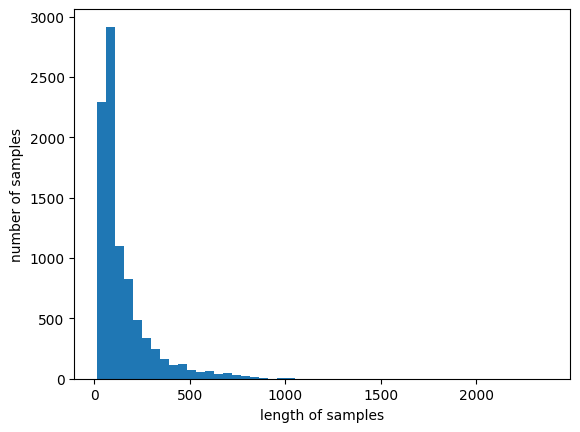

In [ ]:
print('훈련용 뉴스의 최대 길이 :{}'.format(max(len(l) for l in x_train)))
print('훈련용 뉴스의 평균 길이 :{}'.format(sum(map(len, x_train))/len(x_train)))

plt.hist([len(s) for s in x_train], bins=50)
plt.xlabel('length of samples')
plt.ylabel('number of samples')
plt.show()

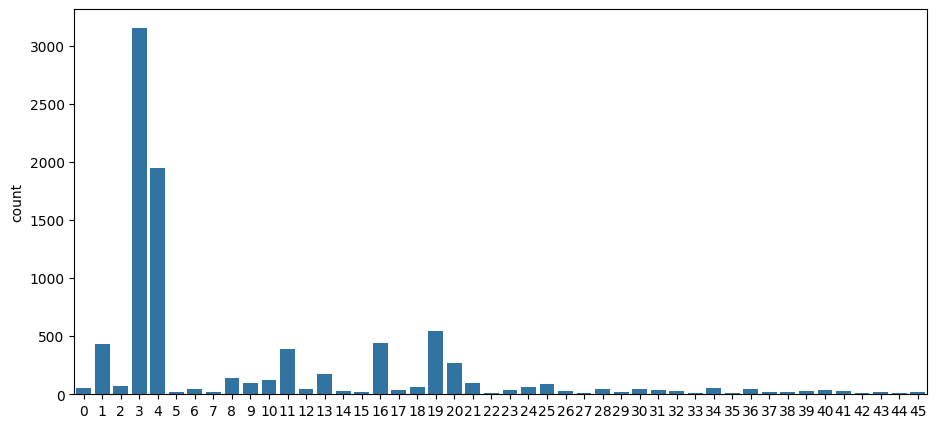

In [ ]:
fig, axe = plt.subplots(ncols=1)
fig.set_size_inches(11,5)
sns.countplot(x=y_train)
plt.show()

In [ ]:
unique_elements, counts_elements = np.unique(y_train, return_counts=True)
print("각 클래스 빈도수:")
print(np.asarray((unique_elements, counts_elements)))

각 클래스 빈도수:
[[   0    1    2    3    4    5    6    7    8    9   10   11   12   13
    14   15   16   17   18   19   20   21   22   23   24   25   26   27
    28   29   30   31   32   33   34   35   36   37   38   39   40   41
    42   43   44   45]
 [  55  432   74 3159 1949   17   48   16  139  101  124  390   49  172
    26   20  444   39   66  549  269  100   15   41   62   92   24   15
    48   19   45   39   32   11   50   10   49   19   19   24   36   30
    13   21   12   18]]


In [ ]:
word_index = reuters.get_word_index(path="reuters_word_index.json")

550378/550378 ━━━━━━━━━━━━━━━━━━━━ 1s 1us/step


In [ ]:
print(word_index['the'], word_index['it'])

1 13


In [ ]:
index_to_word = { index+3 : word for word, index in word_index.items() }

In [ ]:
print(index_to_word[4])
print(index_to_word[16])

the
it


In [ ]:
# index_to_word에 숫자 0은 <pad>, 숫자 1은 <sos>, 숫자 2는 <unk>를 넣어줍니다.
for index, token in enumerate(("<pad>", "<sos>", "<unk>")):
  index_to_word[index]=token

In [ ]:
print(' '.join([index_to_word[index] for index in x_train[0]]))

<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3


In [ ]:
for e in [4, 587, 23, 133, 6, 30, 515]:
  print(index_to_word[e])

the
transaction
is
expected
to
be
completed


In [ ]:
decoded = []
for i in range(len(x_train)):
    t = ' '.join([index_to_word[index] for index in x_train[i]])
    decoded.append(t)
x_train = decoded
print(len(x_train))

8982


In [ ]:
#test데이터도 변환해주세요!
decoded = []
for i in range(len(x_test)):
    t = ' '.join([index_to_word[index] for index in x_test[i]])
    decoded.append(t)
x_test = decoded
print(len(x_test))

2246


In [ ]:
x_train[:5]

['<sos> <unk> <unk> said as a result of its december acquisition of space co it expects earnings per share in 1987 of 1 15 to 1 30 dlrs per share up from 70 cts in 1986 the company said pretax net should rise to nine to 10 mln dlrs from six mln dlrs in 1986 and rental operation revenues to 19 to 22 mln dlrs from 12 5 mln dlrs it said cash flow per share this year should be 2 50 to three dlrs reuter 3',
 '<sos> generale de banque sa lt <unk> <unk> and lt heller overseas corp of chicago have each taken 50 pct stakes in <unk> company sa <unk> factors generale de banque said in a statement it gave no financial details of the transaction sa <unk> <unk> turnover in 1986 was 17 5 billion belgian francs reuter 3',
 '<sos> shr 3 28 dlrs vs 22 cts shr diluted 2 99 dlrs vs 22 cts net 46 0 mln vs 3 328 000 avg shrs 14 0 mln vs 15 2 mln year shr 5 41 dlrs vs 1 56 dlrs shr diluted 4 94 dlrs vs 1 50 dlrs net 78 2 mln vs 25 9 mln avg shrs 14 5 mln vs 15 1 mln note earnings per share reflect the two fo

In [ ]:
x_test[:5]

['<sos> the great atlantic and pacific tea co said its three year 345 mln dlr capital program will be be substantially increased to <unk> growth and expansion plans for <unk> inc and <unk> inc over the next two years a and p said the acquisition of <unk> in august 1986 and <unk> in december helped us achieve better than expected results in the fourth quarter ended february 28 its net income from continuing operations jumped 52 6 pct to 20 7 mln dlrs or 55 cts a share in the latest quarter as sales increased 48 3 pct to 1 58 billion dlrs a and p gave no details on the expanded capital program but it did say it completed the first year of the program during 1986 a and p is 52 4 pct owned by lt <unk> <unk> of west germany reuter 3',
 "<sos> philippine sugar production in the 1987 88 crop year ending august has been set at 1 6 mln tonnes up from a provisional 1 3 mln tonnes this year sugar regulatory administration <unk> chairman <unk> <unk> said <unk> told reuters a survey during the curr

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfTransformer

In [ ]:
dtmvector = CountVectorizer()
x_train_dtm = dtmvector.fit_transform(x_train)
print(x_train_dtm.shape)

(8982, 4867)


In [ ]:
tfidf_transformer = TfidfTransformer()
tfidfv = tfidf_transformer.fit_transform(x_train_dtm)
print(tfidfv.shape)

(8982, 4867)


In [ ]:
x_test_dtm = dtmvector.transform(x_test) #테스트 데이터를 DTM으로 변환
tfidfv_test = tfidf_transformer.transform(x_test_dtm) #DTM을 TF-IDF 행렬로 변환

In [ ]:
print(x_test_dtm.shape)
print(tfidfv_test.shape)

(2246, 4867)
(2246, 4867)


In [ ]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, Conv1D, GlobalMaxPooling1D, Dense, Dropout
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from keras.utils import to_categorical

In [ ]:
# Split data into train and validation sets
x_train, x_val, y_train, y_val = train_test_split(tfidfv, y_train, test_size=0.2, random_state=42)

In [ ]:
# Model Parameters
vocab_size = tfidfv.shape[1]  # Number of features from CountVectorizer
embedding_dim = 64  # Size of embedding layer
num_classes = 46

# Convert target labels to one-hot encoding
y_train = to_categorical(y_train, num_classes=num_classes)
y_val = to_categorical(y_val, num_classes=num_classes)
y_test = to_categorical(y_test, num_classes=num_classes)

In [ ]:
# Build the CNN Model
model = Sequential([
    Embedding(input_dim=vocab_size, output_dim=embedding_dim, input_length=vocab_size),
    Conv1D(filters=64, kernel_size=5, activation='relu'),
    GlobalMaxPooling1D(),
    Dropout(0.5),
    Dense(64, activation='relu'),
    Dropout(0.5),
    Dense(num_classes, activation='softmax')  # Softmax for multi-class classification
])

# Compile the Model
model.compile(optimizer='adam',
              loss='categorical_crossentropy',  # Suitable for multi-class problems
              metrics=['accuracy'])

# Train the Model
history = model.fit(x_train, y_train,  # Pass x_train as input data
                    epochs=10,
                    batch_size=512,
                    validation_data=(x_val, y_val))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 58s 3s/step - accuracy: 0.1368 - loss: 3.7733 - val_accuracy: 0.3534 - val_loss: 3.2738
Epoch 2/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 63s 2s/step - accuracy: 0.3055 - loss: 3.2259 - val_accuracy: 0.3534 - val_loss: 2.6709
Epoch 3/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.2995 - loss: 2.8588 - val_accuracy: 0.3534 - val_loss: 2.4897
Epoch 4/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 35s 2s/step - accuracy: 0.3155 - loss: 2.7188 - val_accuracy: 0.3534 - val_loss: 2.4967
Epoch 5/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 43s 2s/step - accuracy: 0.3192 - loss: 2.6777 - val_accuracy: 0.3534 - val_loss: 2.4364
Epoch 6/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 41s 2s/step - accuracy: 0.3164 - loss: 2.6233 - val_accuracy: 0.3534 - val_loss: 2.4325
Epoch 7/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 47s 3s/step - accuracy: 0.3159 - loss: 2.6084 - val_accuracy: 0.3534 - val_loss: 2.4220
Epoch 8/10
15/15 ━━━━━━━━━━━━━━━━━━━━ 76s 2s/step - accuracy: 0.3230 - loss: 2.5911 - val_accuracy: 0.3534 - val_loss:

In [ ]:
# Evaluate the Model

loss, accuracy = model.evaluate(tfidfv_test, y_test) # Pass the original tfidfv_test
print(f"Validation Accuracy: {accuracy * 100:.2f}%")

71/71 ━━━━━━━━━━━━━━━━━━━━ 28s 388ms/step - accuracy: 0.3664 - loss: 2.4026
Validation Accuracy: 36.20%


- CNN 모델 (num_words=None)
- val_accuracy의 진전이 없음.
- num_words를 5000으로 줄여보고 실행함 → 진전이 없음.
- batch를 바꾸어 봄 → 진전이 없음.

- 테스트 세트에 대한 정확도가 30%선에서 웃돈다.
